# Resume Embedding and Cluster Analysis

This notebook demonstrates how to analyze and visualize resume embeddings and clusters using the provided dataset.

# 1. Setup & Imports

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.express as px


## 2. Load Resume Dataset

Load the resume dataset for embedding and clustering analysis.

In [ ]:
data_path = "../data/UpdatedResumeDataSet.csv"
df = pd.read_csv(data_path)
st_col = "Resume" if "Resume" in df.columns else df.columns[0]
df = df.dropna(subset=[st_col])
print("Total resumes loaded:", len(df))
df.head()

Total resumes loaded: 962


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## 3. Vectorize Resume Text (TF-IDF)

In [13]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df[st_col]).toarray()
print("TF-IDF Embedding shape:", X.shape)

TF-IDF Embedding shape: (962, 1000)


## 4. Dimensionality Reduction (TSNE)

Reduce the high-dimensional TF-IDF vectors to 2D for visualization.

In [14]:
# PCA or TSNE for 2D visualization
reducer = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = reducer.fit_transform(X)

## 5. Clustering (KMeans)

Cluster the resumes in the embedding space.

In [ ]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters
df['x'] = X_embedded[:, 0]
df['y'] = X_embedded[:, 1]

## 6. Visualize Clusters (Plotly and Seaborn)

In [21]:
# Interactive Plotly scatter plot
fig = px.scatter(df, x='x', y='y', color='cluster',
                 hover_data=[st_col],
                 title="Resume Clusters (TSNE + KMeans)")
fig.show()


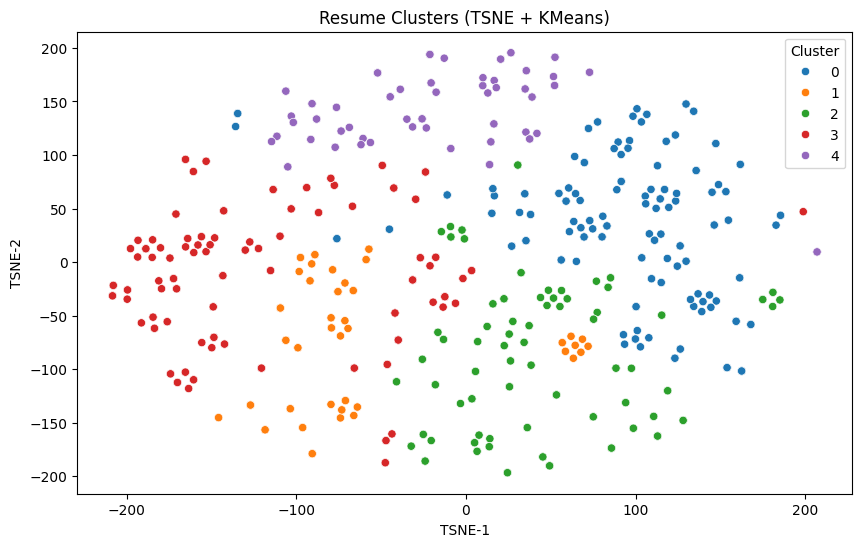

In [22]:
# Static Seaborn scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title('Resume Clusters (TSNE + KMeans)')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend(title='Cluster')
plt.show()

## 7. Cluster Size Bar Plot

Visualize the number of resumes in each cluster.

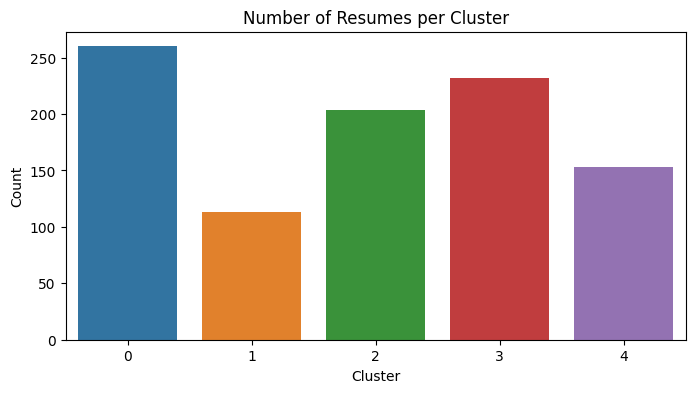

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='cluster', hue='cluster', data=df, palette='tab10', legend=False)
plt.title('Number of Resumes per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## 8. Analyze Cluster Keywords

Extract and visualize the top keywords for each cluster.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_top_keywords(texts, n=10):
    """Extract top n keywords from a list of texts."""
    cv = CountVectorizer(stop_words='english')
    word_matrix = cv.fit_transform(texts)
    sum_words = word_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Print top keywords for each cluster
for i in range(k):
    cluster_texts = df[df['cluster'] == i][st_col]
    keywords = extract_top_keywords(cluster_texts)
    print(f"\nCluster {i} Top Keywords:")
    for word, freq in keywords:
        print(f"{word}: {freq}")


Cluster 0 Top Keywords:
exprience: 1719
months: 1541
java: 893
details: 870
project: 847
year: 798
description: 679
developer: 650
company: 646
maharashtra: 515

Cluster 1 Top Keywords:
test: 733
testing: 679
details: 359
electrical: 358
company: 307
automation: 269
project: 268
description: 255
maharashtra: 245
exprience: 245

Cluster 2 Top Keywords:
details: 616
company: 540
description: 419
exprience: 362
january: 346
maharashtra: 273
months: 259
skill: 238
engineering: 234
college: 228

Cluster 3 Top Keywords:
project: 1712
company: 1608
management: 1336
team: 1276
description: 1176
exprience: 817
business: 792
details: 754
client: 750
sales: 732

Cluster 4 Top Keywords:
data: 1434
exprience: 686
database: 624
description: 593
project: 579
months: 551
using: 540
sql: 509
details: 497
company: 467


## 9. Heatmap of Top Keywords per Cluster

Visualize the frequency of top keywords across clusters.

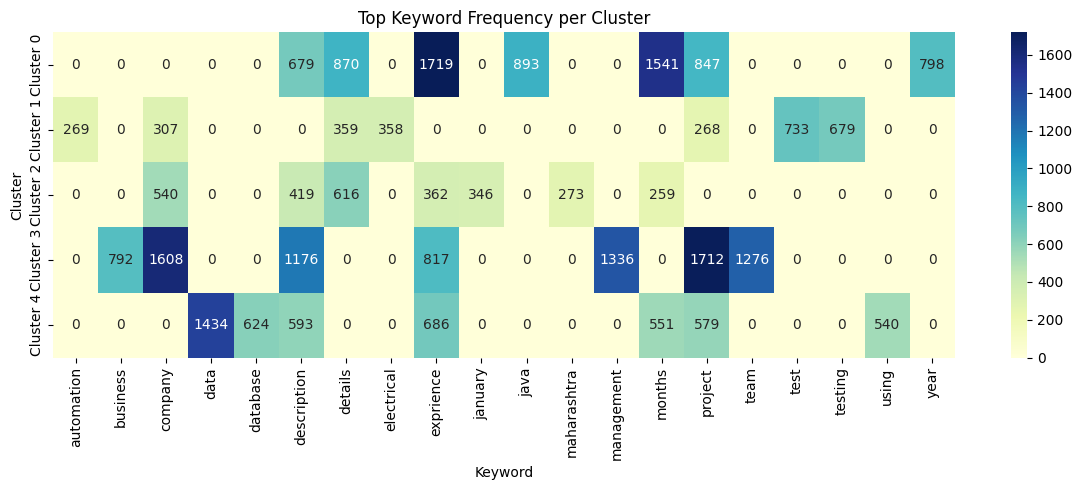

In [19]:
# Build a matrix of top keywords per cluster
top_keywords = set()
cluster_keywords = []
for i in range(k):
    cluster_texts = df[df['cluster'] == i][st_col]
    keywords = extract_top_keywords(cluster_texts, n=7)
    cluster_keywords.append(dict(keywords))
    top_keywords.update([kw for kw, _ in keywords])

top_keywords = sorted(top_keywords)
heatmap_data = np.zeros((k, len(top_keywords)))
for i, kw_dict in enumerate(cluster_keywords):
    for j, kw in enumerate(top_keywords):
        heatmap_data[i, j] = kw_dict.get(kw, 0)

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu',
            xticklabels=top_keywords, yticklabels=[f'Cluster {i}' for i in range(k)])
plt.title('Top Keyword Frequency per Cluster')
plt.xlabel('Keyword')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

## 10. Save Embeddings + Clusters

Save the 2D embeddings and cluster assignments for downstream use.

In [20]:
df[['x', 'y', 'cluster']].to_csv("../data/resume_embeddings.csv", index=False)
print("Embedding file saved.")

Embedding file saved.
